In [4]:
!pip install pandas seaborn matplotlib scikit-learn PyPDF2 openpyxl python-docx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl (11.6 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
     -------------------------------------- 232.6/232.6 KB 1.6 MB/s eta 0:00:00
     -------------------------------------- 250.9/250.9 KB 3.1 MB/s eta 0:00:00
     -------------------------------------- 244.3/244.3 KB 2.1 MB/s eta 0:00:00
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
  Using cached pillow-11.2.1-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
  Using cached kiwisolver-1.

In [5]:

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)


In [9]:

print(data.describe())
print(data.isnull().sum())
print(data.corr())
print(data.info())
print(data.dtypes)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
                   sepal length (cm)  sepal width (cm)  petal length (cm)  

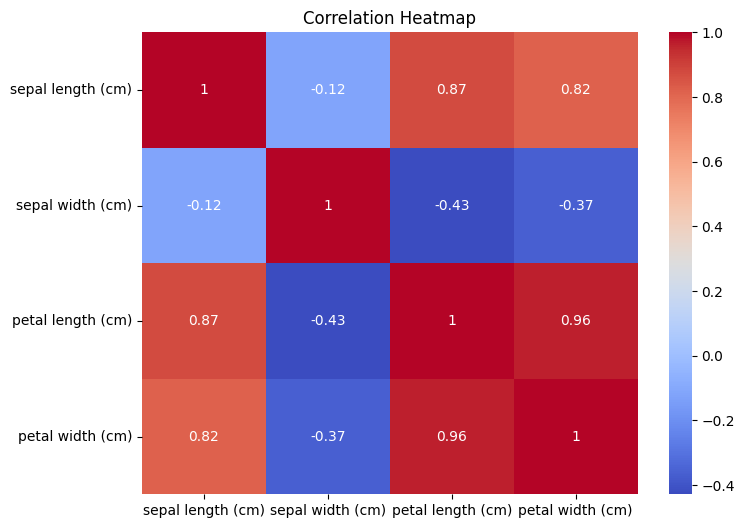

In [ ]:

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:

X = data 
X.fillna(X.mean(), inplace=True) 

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

kmeans = KMeans(n_clusters=3, random_state=42) 
labels = kmeans.fit_predict(X_scaled)

In [ ]:

sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.4799


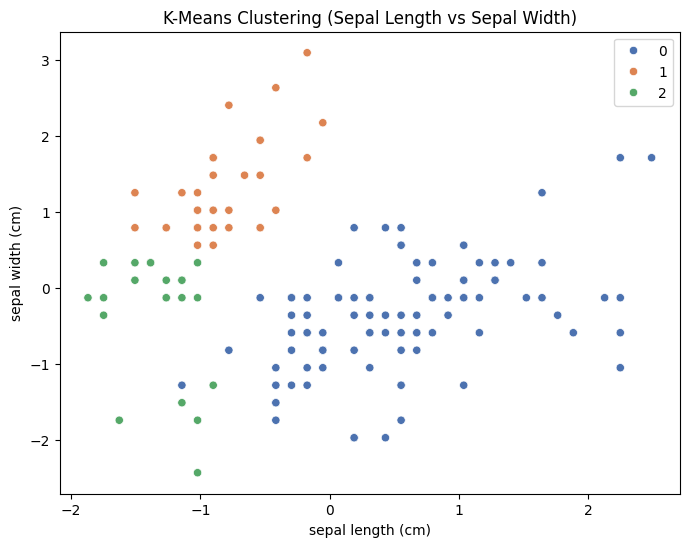

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='deep')
plt.title("K-Means Clustering (Sepal Length vs Sepal Width)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [ ]:
print("Enter measurements (in cm):")
sepal_length = float(input("Sepal Length: "))
sepal_width = float(input("Sepal Width: "))
petal_length = float(input("Petal Length: "))
petal_width = float(input("Petal Width: "))

Enter measurements (in cm):


In [ ]:
input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
print("Raw Input:", input_data)
input_scaled = scaler.transform(input_data)
print("Scaled Input:", input_scaled)

Raw Input: [[ 5.  7.  1. 45.]]
Scaled Input: [[-1.02184904  9.07589117 -1.56757623 57.65577427]]


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:

cluster = kmeans.predict(input_scaled)
print("\nPredicted Cluster:", cluster[0])


Predicted Cluster: 0
